<a href="https://colab.research.google.com/github/Rogerio-mack/Analise-de-Dados/blob/main/EDA_T11_SQL_Joins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Gustavo Rocha">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# SQL Joins

# Preparativos

In [ ]:
# vamos utilizar os mesmos dados da última aula
import sqlite3
import pandas as pd

In [ ]:
!wget http://meusite.mackenzie.br/rogerio/data_load/chinook.db

In [ ]:
connection = sqlite3.connect('chinook.db')

# **Parte I** -  LEFT JOIN



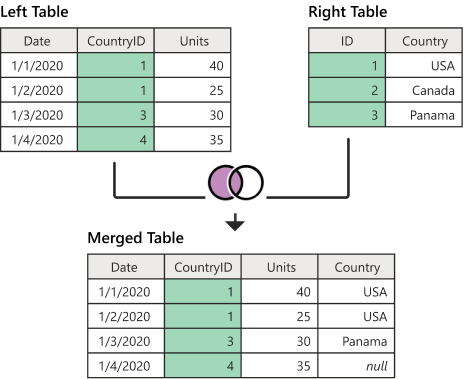

## Introdução à cláusula LEFT JOIN

* Semelhante à cláusula INNER JOIN, a cláusula LEFT JOIN é uma cláusula opcional da instrução SELECT. Use a cláusula LEFT JOIN para consultar dados de várias tabelas relacionadas.

Suponha que temos duas tabelas: A (LEFT TABLE) e B (RIGHT TABLE) como na figura acima.

* A tem colunas Date, CountryID e Units.
* B tem colunas ID e Country.
Para realizar a junção entre A e B usando a cláusula LEFT JOIN, você usa a seguinte instrução:



```
SELECT
	A.CountryID, A.Units, B.Country
FROM
	A
LEFT JOIN B ON A.CountryID = B.ID
```



### Note que:
A instrução retorna um conjunto de resultados que inclui:

* Linhas na tabela A (tabela à esquerda) que possuem linhas correspondentes na tabela B.
* As linhas da tabela A e as linhas da tabela B são preenchidas com valores NULL, caso a linha da tabela A não tenha nenhuma linha correspondente na tabela B.

Em outras palavras, todas as linhas da tabela A são incluídas no conjunto de resultados, haja ou não linhas correspondentes na tabela B. Caso não haja se preenche com o NULL

### Sobre o banco de dados `Chinook`
Amostras de tabelas de banco de dados Chinook:
* Existem 11 tabelas no banco de dados de amostra chinook.

### Referências
* https://docs.microsoft.com/pt-br/power-query/merge-queries-left-outer

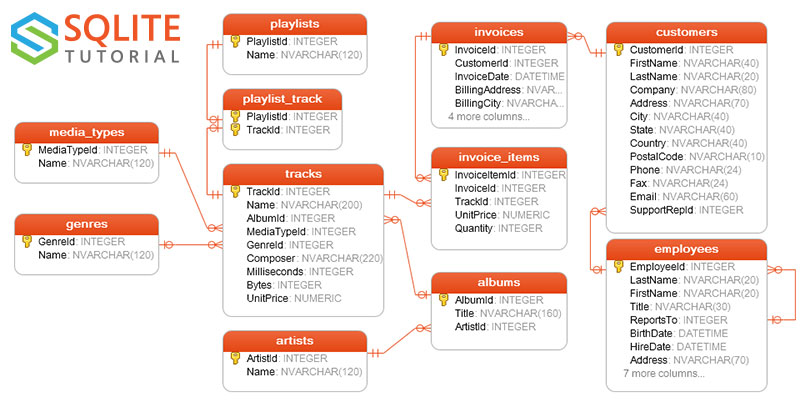

### **Tabelas** do banco
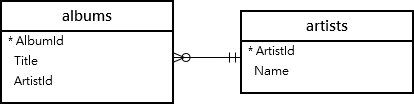

### `LEFT JOIN` na prática
Usaremos as tabelas de artistas e álbuns no banco de dados de amostra para demonstração.


Um álbum pertence a um artista. No entanto, um artista pode ter zero ou mais álbuns.

Para localizar artistas que não possuem nenhum álbum usando a cláusula `LEFT JOIN`, selecionamos os artistas e seus álbuns correspondentes. Se um artista não tiver nenhum álbum, o valor da coluna AlbumId será NULL.

**Para exibir os artistas que não possuem nenhum álbum primeiro, temos duas opções:**

* Primeiro, use a cláusula `ORDER BY` para listar as linhas cujo AlbumId tem valores NULL primeiro.

* Em segundo lugar, use a cláusula WHERE e o operador IS NULL para listar apenas os artistas que não possuem nenhum álbum.

Usando `LEFT JOIN` com `ORDER BY`:

In [ ]:
query = ('''SELECT
   artists.ArtistId, 
   AlbumId
FROM
   artists
LEFT JOIN albums ON
   albums.ArtistId = artists.ArtistId
ORDER BY
   AlbumId''')
df = pd.read_sql(query, connection)

df

**Outra opção:**

In [ ]:
query = ('''SELECT
   artists.ArtistId
   , AlbumId
FROM
   artists
LEFT JOIN albums ON
   albums.ArtistId = artists.ArtistId
WHERE
   AlbumId IS NULL''')
df = pd.read_sql(query, connection)

df

### Um outro exemplo: Trazer o nome do cliente e as datas das faturas(invoices) que eles possam ter gerado.

In [ ]:
query = ('''SELECT
   c.FirstName, c.LastName
   , i.InvoiceDate
FROM
   customers c
LEFT JOIN invoices i ON
   c.CustomerId = i.customerId
''')
df = pd.read_sql(query, connection)

df

# Parte II - Outras operações `CRUD` (Create, Read, Update e Delete)

As outras operações de interesse para nós neste curso são:
  * Criar tabelas (CREATE TABLE)
  * Modificar conteúdo de tabelas (UPDATE)
  * Deletar linhas de tabelas (DELETE)

Faremos isso chamando o método `cursor`. Não entraremos em muitos detalhes sobre o seu significado. Basta neste curso entender a sintaxe. 

In [ ]:
cursor = connection.cursor()

## `INSERT INTO`

* O `INSERT INTO` é o comando utilizado para inserir novas linhas em uma determinada coluna
* A lista de nomes de colunas é seguida pela palavra-chave SQL **`VALUES`** e uma lista separada por vírgulas de valores entre parênteses
* Os valores fornecidos devem corresponder aos nomes das colunas especificados em ordem e tipo de acordo com a seguinte sintaxe



```
INSERT INTO table1 (column1,column2 ,..)
VALUES 
   (value1,value2 ,...),
   (value1,value2 ,...),
    ...
   (value1,value2 ,...)
```



In [ ]:
cursor = cursor.execute("""INSERT INTO artists (name)
                              VALUES('Bud Powell')""")

In [ ]:
#verificando a nova entrada
query = ('''SELECT
	ArtistId,
	Name
FROM
	Artists
ORDER BY
	ArtistId DESC
LIMIT 1
''')
df = pd.read_sql(query, connection)

df

In [ ]:
cursor = cursor.execute("""INSERT INTO artists (name)
VALUES
	("Buddy Rich"),
	("Candido"),
	("Charlie Byrd")""")

In [ ]:
#verificando a nova entrada
query = ('''SELECT
	ArtistId,
	Name
FROM
	Artists
ORDER BY
	ArtistId DESC
LIMIT 3
''')
df = pd.read_sql(query, connection)

df

## Update Table

* Primeiro, especifique a tabela onde deseja atualizar após a cláusula UPDATE.

* Em segundo lugar, defina um novo valor para cada coluna da tabela na cláusula SET.

* Terceiro, especifique as linhas a serem atualizadas usando uma condição na cláusula WHERE. A cláusula WHERE é opcional. Se você ignorá-lo, a instrução UPDATE atualizará os dados em todas as linhas da tabela.
Finalmente, use as cláusulas ORDER BY e LIMIT na instrução UPDATE para especificar o número de linhas a serem atualizadas.

Sintaxe:


```
# UPDATE table
SET column_1 = new_value_1,
    column_2 = new_value_2
WHERE
    search_condition
```
IMPORTANTE: NÃO ESQUECER O `WHERE`!!!


Exemplo com uma única coluna

In [ ]:
cursor = cursor.execute("""UPDATE employees
SET lastname = 'Smith'
WHERE employeeid = 3""")

In [ ]:
#verificando a nova entrada
query = ('''SELECT
	employeeid,
	firstname,
	lastname,
	title,
	email
FROM
	employees
WHERE
	employeeid = 3
''')
df = pd.read_sql(query, connection)

df

Exemplo com múltiplas colunas:


In [ ]:
cursor = cursor.execute("""UPDATE employees
SET city = 'Toronto',
    state = 'ON',
    postalcode = 'M5P 2N7'
WHERE
    employeeid = 4""")

In [ ]:
#verificando a nova entrada
query = ('''SELECT
	employeeid,
	firstname,
	lastname,
	state,
	city,
	PostalCode
FROM
	employees
WHERE
	employeeid = 4
''')
df = pd.read_sql(query, connection)

df

## Delete

Você aprendeu como inserir uma nova linha em uma tabela e atualizar os dados existentes de uma tabela. Às vezes, você precisa remover linhas de uma tabela. Nesse caso, você usa a instrução `DELETE`:

* Primeiro, especifique o nome da tabela da qual deseja remover as linhas após as palavras-chave DELETE FROM.

* Em segundo lugar, adicione uma condição de pesquisa na cláusula WHERE para identificar as linhas a serem removidas. A cláusula WHERE é uma parte opcional da instrução DELETE. **Se você omitir a cláusula WHERE, a instrução DELETE excluirá todas as linhas da tabela.**

A instrução `DELETE` permite que você exclua uma linha, várias linhas e todas as linhas de uma tabela. 


Sintaxe:


```
# DELETE FROM table
WHERE search_condition
```
IMPORTANTE: NÃO ESQUECER O `WHERE`!!!


In [ ]:
# não se preocupe com esse código.
cursor = cursor.execute("""CREATE TABLE artists_backup(
   artistid INTEGER PRIMARY KEY AUTOINCREMENT,
   name NVARCHAR
)""")

In [ ]:
cursor = cursor.execute("""INSERT INTO artists_backup 
SELECT artistid,name
FROM artists
""")

In [ ]:
#verificando a tabela artistas backup
query = ('''SELECT
	*
FROM
	artists_backup
''')
df = pd.read_sql(query, connection)

df

In [ ]:
# deletar AC/DC na entrada 1
cursor = cursor.execute("""DELETE FROM artists_backup
WHERE artistid = 1
""")

In [ ]:
# verificando a tabela artistas backup
query = ('''SELECT
	*
FROM
	artists_backup
''')
df = pd.read_sql(query, connection)

df

## Create Table

Para criar uma nova tabela no SQLite, use a instrução CREATE TABLE com a seguinte sintaxe:


```
CREATE TABLE [IF NOT EXISTS] table_name (
	column_1 data_type PRIMARY KEY,
   	column_2 data_type NOT NULL,
	column_3 data_type DEFAULT 0,
	table_constraints
)
```
Nesta sintaxe:

* Primeiro, especifique o nome da tabela que deseja criar após as palavras-chave CREATE TABLE. 

* Em segundo lugar, use a opção IF NOT EXISTS para criar uma nova tabela se ela não existir. Tentar criar uma tabela que já existe sem usar a opção IF NOT EXISTS resultará em erro.

* Terceiro, especifique a lista de colunas da tabela. Cada coluna possui um nome, tipo de dados e a restrição da coluna. 


Antes de criar as tabelas no nosso banco de dados,temos que definir quais são as características de cada um dos campos.As características que o SQL exige sã o tipo e o tamanho de cada campo.

Tipo de dado:
* **INTEGER OU INT** - Número positivo ou negativo inteiro.

* **SMALLINT** - Mesma função do INT, mas ocupa a metade do espaço.
* **NUMERIC** - Número positivo ou negativo. Deve-se informar o tamanho do campo e casas decimais.
* **DECIMAL** - Semelhante a NUMERIC, em alguns casos tem maior precisão em casas decimais.
* **REAL** - Número de ponto flutuante de simples precisão(Exponencial).
* **DOUBLE PRECISION** - Número de ponto flutuante de dupla precisão.
* **FLOAT** - Número de ponto flutuante em que você define o nível de precisão (número de dígitos significativos).
* **BIT** - Armazenamento de um número fixo de bits.
* **BIT VARYING** -  Igual a BIT, permitindo armazenar valores maiores. Normalmente utilizado para armazenar imagens.
* **DATE** - Permite armazenar datas.
* **TIME** - Permite armazenar horários.
* **TIMESTAMP** - Permite armazenar uma combinação de data e hora.
* **CHAR** - Permite armazenar cadeia de caracteres. Tamanho informado será fixo.
* **VARCHAR** - Permite armazenar cadeia de caracteres, mas de tamanho variável.

### Vamos crirar um novo banco chamado contatos e uma tabela employees para não alterar as anteriores


In [ ]:
conn = sqlite3.connect('contatos.db')
cursor = conn.cursor()

#Drop em EMPLOYEE se já existir.
cursor.execute("DROP TABLE IF EXISTS EMPLOYEE")

#Criar a tabela de acordo com os requisitos
sql ='''CREATE TABLE EMPLOYEE(
   FIRST_NAME CHAR(20) NOT NULL,
   LAST_NAME CHAR(20),
   AGE INT,
   SEX CHAR(1),
   INCOME FLOAT
)'''
cursor.execute(sql)
print("Tabela criada com sucesso........")

# Commit na db
conn.commit()

#Fechar a conexão
conn.close()

In [ ]:
conn = sqlite3.connect('contatos.db')
query = ('''SELECT * from employee''')
df = pd.read_sql(query, conn)

df

### Adicione algumas linhas na tabela acima para exercitar o INSERT

# Referências:
* [Página do SQL Tutorial](https://www.sqlitetutorial.net/): referência principal para a a maioria dos exemplos deste material. Algumas partes são tradução direta. Referência mais apropriada para quem quiser se aprofundar no que não tivemos chance de abordar no curso.
* [Artigo do Level-UP](https://levelup.gitconnected.com/sql-joins-2cc89babb6f9): referência para algumas das figuras
* [Github da Chinook db](https://github.com/lerocha/chinook-database): link para o código fonte que gera a base.

# Exercícios:
* Nas questões abaixo se preocupe em preencher o código SQL

## Questão 1
* Encontre na base chinook o nome dos artistas que não possuem albums. Preencha a parte da query.

In [ ]:
#solução:
connection = sqlite3.connect('chinook.db')
query = ('''seu código aqui''')

df = pd.read_sql(query, connection)

df

## Questão 2
* Cosntrua uma tabela que traga o nome da música, o nome do artista e o nome do tipo de media em que o arquivo foi gravado. Faça os JOINs (são 3 LEFT JOINs) apropriados com a tabela tracks, albums, artists e media_types. 

In [ ]:
#solução:
connection = sqlite3.connect('chinook.db')

query = ('''seu código aqui''')

df = pd.read_sql(query, connection)

df

## Questão 3
* Na questão anterior você deve ter notado que as colunas possuem o mesmo nome. Use o comando adequado para renomear.


In [ ]:
#solução
connection = sqlite3.connect('chinook.db')
query = ('''seu código aqui''')

df = pd.read_sql(query, connection)

df

## Questão 4
* Crie uma base de dados chamada clientes.db e dentro dela uma tabela vazia chamada clientes em que existam os seguintes campos: id(INTEGER),	nome(TEXT),	idade(INTEGER),	cpf(VARCHAR(11)),	email(TEXT), fone(TEXT), Cidade(TEXT),	UF(VARCHAR(2)),	criado_em(DATE) 

In [ ]:
#solução
conn = sqlite3.connect('clientes.db')
cursor = conn.cursor()

#Drop em EMPLOYEE se já existir.
cursor.execute("DROP TABLE IF EXISTS clientes")

#Criar a tabela de acordo com os requisitos
sql ='''
CREATE TABLE clientes (
	#complete o seu código aqui#
)'''
cursor.execute(sql)
print("Tabela criada com sucesso........")

# Commit na db
conn.commit()

#Fechar a conexão
conn.close()

In [ ]:
#verifica se a tabela foi criada com sucesso (vazia)
conn = sqlite3.connect('clientes.db')
query = ('''#complete seu código aqui#''')

df = pd.read_sql(query, conn)

df

## Questão 5
* Escreva o comando para na tabela do exercício 4 inserir as seguintes linhas(uma por vez, escreva para a primeira e repita o comando para a segunda):
  * ('João', 23, '00000000000', 'joao@email1.com', '11-22222-2222', 'Sao Paulo', 'SP', '2021-05-10')
  * ('Maria', 24, '11111111111', 'maria@email2.com', '11-33333-3333', 'Sorocaba', 'SP', '2021-05-09')

In [ ]:
# Solução
conn = sqlite3.connect('clientes.db')
cursor = conn.cursor()

sql='''#seu código aqui#'''


cursor.execute(sql)
conn.commit()

#Fechar a conexão
conn.close()

In [ ]:
conn = sqlite3.connect('clientes.db')
cursor = conn.cursor()
sql ='''#seu código aqui#'''
cursor.execute(sql)
conn.commit()

#Fechar a conexão
conn.close()

In [ ]:
#verifica se a tabela foi modificada com sucesso (vazia)
connection = sqlite3.connect('clientes.db')
query = ('''#seu código aqui#''')

df = pd.read_sql(query, connection)

df

## Questão 6
* Remova a linha Maria da questão 5:
  * ('Maria', 24, '11111111111', 'maria@email2.com', '11-33333-3333', 'Sorocaba', 'SP', '2021-05-09')

In [ ]:
#solução
conn = sqlite3.connect('clientes.db')
cursor = conn.cursor()

sql ='''#seu código aqui#'''

cursor.execute(sql)
conn.commit()

#Fechar a conexão
conn.close()

In [ ]:
# verifica se a tabela foi modificada com sucesso
connection = sqlite3.connect('clientes.db')
query = ('''#seu código aqui#''')

df = pd.read_sql(query, connection)

df

## Questão 7
* Modifique o nome de João para Marcos, assim como o email, para a tabela do exercício anterior

In [ ]:
#solução
conn = sqlite3.connect('clientes.db')
cursor = conn.cursor()

sql ='''#seu código aqui#'''

cursor.execute(sql)
conn.commit()

#Fechar a conexão
conn.close()

In [ ]:
#verifica se a tabela foi criada com sucesso (vazia)
connection = sqlite3.connect('clientes.db')
query = ('''#seu código aqui#''')

df = pd.read_sql(query, connection)

df